<a href="https://colab.research.google.com/github/AlxScottt/scratchpad/blob/main/1_20_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 69 (delta 11), reused 6 (delta 6), pack-reused 41 (from 2)
Receiving objects: 100% (69/69), 13.84 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


In [5]:
import pandas as pd
df = pd.read_csv("/content/data/sharks.csv")

/tmp/ipython-input-3291444368.py:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/sharks.csv")


In [8]:
print("Total amount of attacks " + str((len(df))))
Unprovoked_count = 0;
Boating_count=0;
Provoked_count=0;
questionable_count=0;
USA_counter = 0;
for index, row in df.iterrows():
    if row['Type'] == 'Unprovoked':
      Unprovoked_count+=1
    if row['Type'] == 'Boating':
      Boating_count+=1
    if row['Type'] == 'Provoked':
      Provoked_count+=1
    if row['Type'] == 'Questionable':
      questionable_count+=1
    if row['Country'] == 'USA':
      USA_counter+=1;

print("Provoked_count", Provoked_count)
print("Boating Count", Boating_count)
print("Unprovoked Count", Unprovoked_count)
print("Questionable Count", questionable_count)
print("USA amount of attacks", USA_counter)



Total amount of attacks 6462
Provoked_count 593
Boating Count 92
Unprovoked Count 4716
Questionable Count 10
USA amount of attacks 2310


<Axes: title={'center': 'Country Chart'}, ylabel='Frequency'>

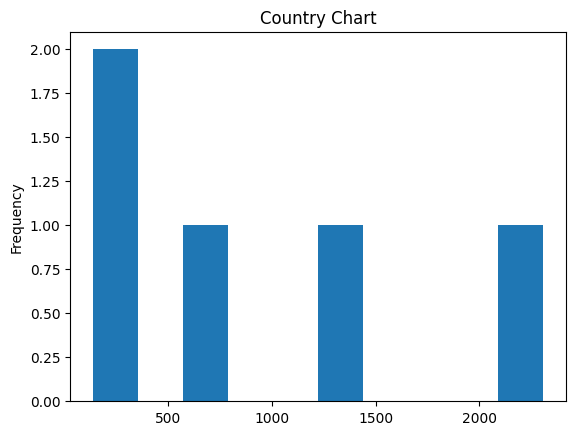

In [25]:
#df.plot.bar(x='Type', y=df.count, title='Type Chart')
#df.count()
#df["Type"].unique()
df['Type'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
#df['Country'].value_counts().head(5)
df['Country'].value_counts().head(5).plot.hist(title='Country Chart')

